<a href="https://colab.research.google.com/github/sagarsp/AI-plays-flappy-bird-with-reinforcement-learning/blob/master/AI_plays_flappy_bird_with_reinforcement_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "stable-baselines3[extra]"
!pip install "gymnasium[all]"
!pip install flappy-bird-gymnasium==0.2.2

  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Preparing metadata (setup.py) ... done
  Using cached pygame-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.7 MB)
  Using cached swig-4.1.1-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.8 MB)
  Using cached mujoco_py-2.1.2.14-py3-none-any.whl (2.4 MB)
  Using cached mujoco-2.3.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.6 MB)
  Using cached jax-0.3.24-py3-none-any.whl
  Using cached jaxlib-0.3.24-cp310-cp310-manylinux2014_x86_64.whl (70.0 MB)
  Using cached lz4-4.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Using cached glfw-2.6.2-py2.py27.py3.py30.py31.py32.py33.py34.py35.py36.py37.py38-none-manylinux2014_x86_64.whl (208 kB)
  Using cached fasteners-0.18-py3-none-any.whl (18 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates fr

In [2]:
import flappy_bird_gymnasium
import gymnasium as gym
import time
import random

In [3]:
env = gym.make("FlappyBird-v0")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
episodes = 1
for episode in range(episodes):
  print("New Game")
  env.reset()
  terminated = False
  while not terminated:
    action = env.action_space.sample()
    obs, reward, terminated, _, info = env.step(action)
    #print (reward)
  env.close()


New Game


In [5]:
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from matplotlib import pyplot as plt
env = gym.make("FlappyBird-v0")
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 1)

/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(


In [6]:
state = env.reset()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
obs, reward, terminated, info = env.step([env.action_space.sample()])

In [8]:
import os
from stable_baselines3 import PPO
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import BaseCallback

In [9]:
LOG_DIR = './logs'

In [10]:
#model = PPO('MlpPolicy', env, verbose=1, tensorboard_log = LOG_DIR, learning_rate=0.001,n_steps=128)
model = DQN('MlpPolicy', env, verbose=1)

Using cpu device


In [11]:
model.learn(total_timesteps=4000000, log_interval=1000)

Streaming output truncated to the last 5000 lines.
|    fps              | 781      |
|    time_elapsed     | 309      |
|    total_timesteps  | 241881   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.5e-05  |
|    n_updates        | 47970    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2400     |
|    fps              | 781      |
|    time_elapsed     | 310      |
|    total_timesteps  | 242285   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.58e-05 |
|    n_updates        | 48071    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2404     |
|    fps              | 781      |
|   

In [21]:
model.save('dqn_testmodel')

In [22]:
model = DQN.load('dqn_testmodel')

In [23]:
import numpy as np
games_count = 100
total_rewards_list = np.zeros(games_count)
for i in range(games_count):
  state = env.reset()
  terminated = False
  total_reward = 0
  while not terminated:
    action, _ = model.predict(state)
    state, reward, terminated, info = env.step(action)
    total_reward += reward
  total_rewards_list[i] = total_reward[0]
  print(i,total_reward[0])

0 11.100006
1 9.000002
2 9.000002
3 9.200003
4 11.000006
5 9.000002
6 9.000002
7 9.000002
8 9.000002
9 9.000002
10 9.000002
11 9.100002
12 11.300007
13 9.000002
14 9.000002
15 9.000002
16 9.100002
17 9.800005
18 9.000002
19 9.000002
20 9.000002
21 9.700005
22 11.600008
23 11.700008
24 9.000002
25 9.000002
26 9.100002
27 9.400003
28 9.400003
29 9.000002
30 9.000002
31 9.800005
32 9.000002
33 11.100006
34 9.000002
35 11.400007
36 9.000002
37 9.000002
38 9.000002
39 9.000002
40 9.000002
41 9.500004
42 9.000002
43 11.100006
44 9.000002
45 9.000002
46 9.000002
47 11.300007
48 13.500015
49 9.000002
50 9.000002
51 9.000002
52 9.600004
53 9.400003
54 9.000002
55 9.000002
56 9.000002
57 9.000002
58 9.000002
59 9.000002
60 9.000002
61 9.000002
62 9.700005
63 9.800005
64 9.700005
65 9.000002
66 9.000002
67 9.000002
68 9.400003
69 13.500015
70 9.000002
71 9.000002
72 9.100002
73 9.000002
74 9.000002
75 9.000002
76 9.000002
77 9.100002
78 16.300022
79 9.700005
80 9.000002
81 9.000002
82 9.000002
83

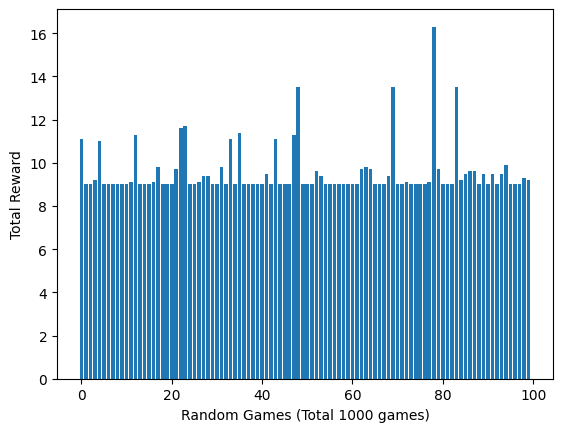

In [24]:
plt.bar(range(games_count),total_rewards_list)
plt.xlabel('Random Games (Total 1000 games)')
plt.ylabel('Total Reward')
plt.show()

In [25]:
# Set up fake display; otherwise rendering will fail
import os
os.system("Xvfb :1 -screen 0 1024x768x24 &")
os.environ['DISPLAY'] = ':1'

In [26]:
import base64
from pathlib import Path

from IPython import display as ipythondisplay


def show_videos(video_path="", prefix=""):
    """
    Taken from https://github.com/eleurent/highway-env

    :param video_path: (str) Path to the folder containing videos
    :param prefix: (str) Filter the video, showing only the only starting with this prefix
    """
    html = []
    for mp4 in Path(video_path).glob("{}*.mp4".format(prefix)):
        video_b64 = base64.b64encode(mp4.read_bytes())
        html.append(
            """<video alt="{}" autoplay
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{}" type="video/mp4" />
                </video>""".format(
                mp4, video_b64.decode("ascii")
            )
        )
    ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))

In [27]:
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv


def record_video(env_id, model, video_length=500, prefix="", video_folder="videos/"):
    """
    :param env_id: (str)
    :param model: (RL model)
    :param video_length: (int)
    :param prefix: (str)
    :param video_folder: (str)
    """
    env = gym.make("FlappyBird-v0", render_mode="rgb_array")
    env = DummyVecEnv([lambda: env])
    env = VecFrameStack(env, 1)
    #eval_env = DummyVecEnv([lambda: gym.make(env_id, render_mode="rgb_array")])
    # Start the video at step=0 and record 500 steps
    eval_env = VecVideoRecorder(
        env,
        video_folder=video_folder,
        record_video_trigger=lambda step: step == 0,
        video_length=video_length,
        name_prefix=prefix,
    )

    obs = eval_env.reset()
    for _ in range(video_length):
        action, _ = model.predict(obs)
        obs, _, _, _ = eval_env.step(action)

    # Close the video recorder
    eval_env.close()

In [28]:
record_video(env, model, video_length=5000, prefix="dqn-FlappyBird-v0")

Saving video to /content/videos/ppo-FlappyBird-v0-step-0-to-step-5000.mp4
Moviepy - Building video /content/videos/ppo-FlappyBird-v0-step-0-to-step-5000.mp4.
Moviepy - Writing video /content/videos/ppo-FlappyBird-v0-step-0-to-step-5000.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/ppo-FlappyBird-v0-step-0-to-step-5000.mp4


In [29]:
show_videos("videos", prefix="dqn-FlappyBird-v0-step-0-to-step-5000")